<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Non_Linear_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
 # Set random seed for reproducibility
np.random.seed(42)

# Generate 200 data points for X and Y
X = np.random.uniform(-10, 10, 200)
Y = np.random.uniform(-10, 10, 200)

# Create a non-linear boundary for class assignment
# Using a circular decision boundary for class separation
radius = 5
class_labels = np.where(X**2 + Y**2 < radius**2, 0, 1)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y, 'Class': class_labels})

# Show first few rows of the dataset
data.head()


,X,Y,Class
0,-2.509198,2.840633,0
1,9.014286,-8.317201,1
2,4.639879,-6.767426,1
3,1.973170,7.971084,1
4,-6.879627,2.128581,1


In [6]:
X = data[['X', 'Y']].values
y = data['Class'].values

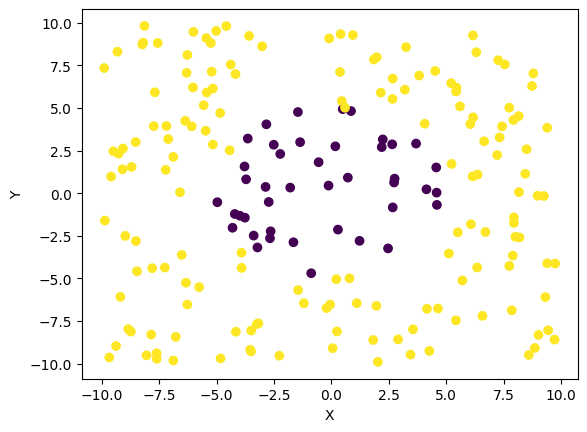

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X,y)

LogisticRegression()

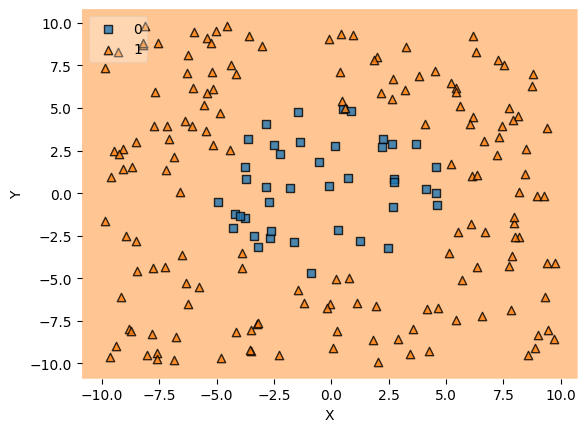

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=clf,legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X,y,scoring='accuracy',cv=10)
print("Mean accuracy score:",scores.mean())

Mean accuracy score: 0.79


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(X)

In [33]:
X_poly

array([[  -2.50919762,    2.84063292,    6.29607271, ...,   17.88483143,
         -20.24720593,   22.92162213],
       [   9.01428613,   -8.3172007 ,   81.2573544 , ..., -675.83372491,
         623.57070211, -575.34924079],
       [   4.63987884,   -6.76742572,   21.52847561, ..., -145.69235955,
         212.49740688, -309.93490716],
       ...,
       [   7.9422052 ,   -1.42011945,   63.07862342, ...,  -89.57918016,
          16.01735703,   -2.86401065],
       [   7.74172849,    5.01742136,   59.93435994, ...,  300.71593751,
         194.89427584,  126.31115953],
       [   5.59751092,    5.09085748,   31.33212847, ...,  159.50740063,
         145.0697383 ,  131.93888739]])

In [35]:
clf1=LogisticRegression(solver='lbfgs', max_iter=1000)
scores=cross_val_score(clf1,X_poly,y,scoring='accuracy',cv=10)
print("Mean accuracy score after PolynomailFeatures:",scores.mean())

Mean accuracy score after PolynomailFeatures: 0.975


In [39]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

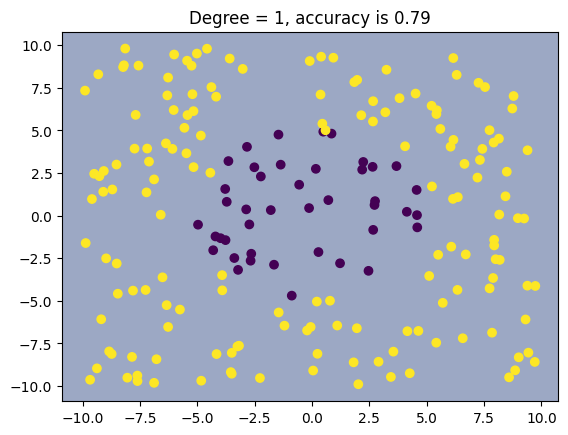

In [40]:
plot_decision_boundary(X,y)

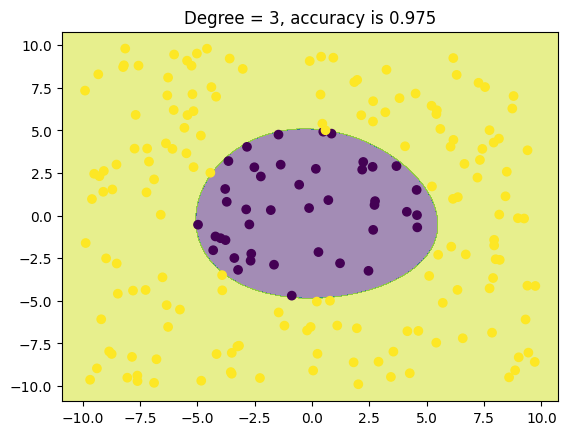

In [41]:
plot_decision_boundary(X,y,degree=3)

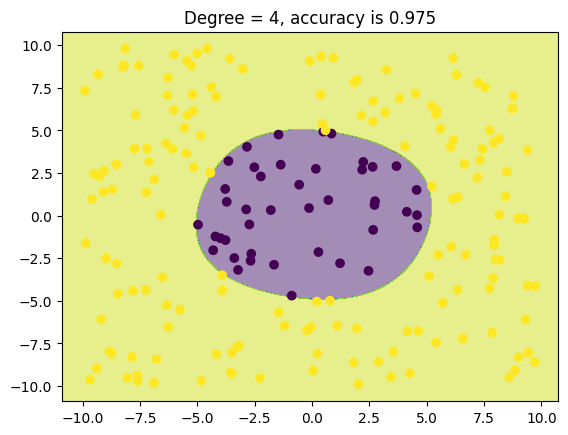

In [42]:
plot_decision_boundary(X,y,degree=4)